/tmp/ipykernel_1051890/3612343350.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  discrete_cmap = mpl.cm.get_cmap("bwr", 11)


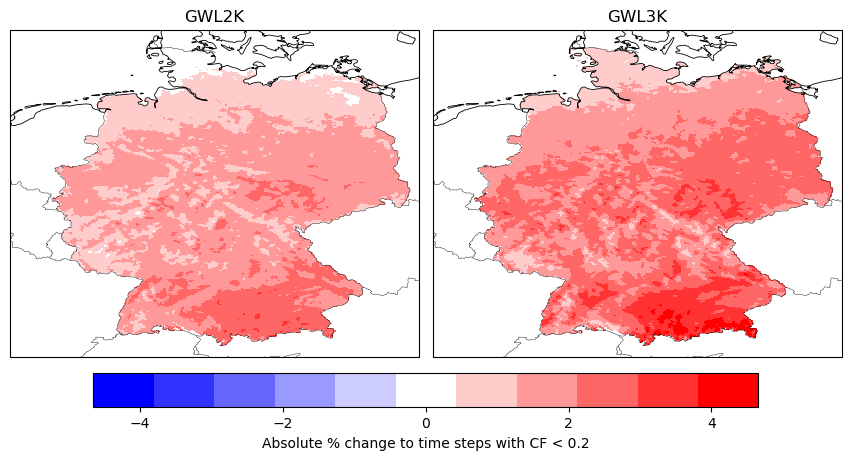

Mean value historical: 25.389208712457002%
Mean value GWL2K: 26.898675166591605%
Mean value GWL3K: 27.551780895018236%
Mean difference GWL2K: 1.5094664541346676%
Mean difference GWL3K: 2.1625721825614765%


In [1]:
#Dunkelflaute absolute percentage change when compared to historical for the entire year
#Values are higher if we use 5MW turbines
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
import json

proj = ccrs.PlateCarree()
fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(14, 4.5),
    subplot_kw=dict(projection=proj),
    layout='compressed',
)
discrete_cmap = mpl.cm.get_cmap("bwr", 11)
discrete_cmap.set_bad(color=(0, 0, 0, 0))   
with open("Dunkelflaute/Germany.json", "r", encoding="utf-8") as file:
    file_locations=json.load(file)
    data_location=file_locations["3_3MW"]["CEU-3_MPI-M-MPI-ESM1-2-HR_CLMcom-Hereon-CCLM-6-0-clm2_Dunkelflaute"]
    file_1=xr.open_dataset(data_location["historical"]["Year"]["timmean"])
    file_2=xr.open_dataset(data_location["ssp370-GWL2K"]["Year"]["timmean"])
    file_3=xr.open_dataset(data_location["ssp370-GWL3K"]["Year"]["timmean"])

    GWL2K=file_2["Dunkelflaute"].values-file_1["Dunkelflaute"].values
    GWL3K=file_3["Dunkelflaute"].values-file_1["Dunkelflaute"].values
    if np.nanmin(GWL2K)<np.nanmin(GWL3K):
        v_min=np.nanmin(GWL2K)
    else:
        v_min=np.nanmin(GWL3K)

    if np.nanmax(GWL2K)>np.nanmax(GWL3K):
        v_max=np.nanmax(GWL2K)
    else:
        v_max=np.nanmax(GWL3K)
    v_min=v_min*100
    v_max=v_max*100

    if abs(v_min)>abs(v_max):
        v_max=abs(v_min)
    else:
        v_min=-v_max

    files=[GWL2K,GWL3K]
    scenarios=["GWL2K","GWL3K"]
    for ax, file, scenario in zip(axes, files,scenarios):
        cf_flaute=file*100
        lat = file_1['lat'].values
        lon = file_1['lon'].values 

        cf_masked = np.squeeze(np.ma.masked_equal(cf_flaute, 0))

        pm = ax.pcolormesh(lon, lat, cf_masked,
                        cmap=discrete_cmap,vmin=v_min,vmax=v_max,
                        shading='auto',
                        transform=proj)

        ax.coastlines(linewidth=0.6)
        ax.add_feature(cfeature.BORDERS, linewidth=0.3)
        ax.set_title(scenario, fontsize=12)

    cbar = fig.colorbar(pm, ax=axes.ravel().tolist(), orientation='horizontal', pad=0.05, shrink=0.8, label='Absolute % change to time steps with CF < 0.2')
    # plt.savefig("Dunkelflaute_Summary/dunkelflaute_changes.pdf", bbox_inches="tight", format="pdf", dpi=300)
    plt.show()
    print(f"Mean value historical: {np.nanmean(file_1['Dunkelflaute'].values)*100}%")
    print(f"Mean value GWL2K: {file_2['Dunkelflaute'].mean().item()*100}%")
    print(f"Mean value GWL3K: {file_3['Dunkelflaute'].mean().item()*100}%")
    print(f"Mean difference GWL2K: {np.nanmean(GWL2K)*100}%")
    print(f"Mean difference GWL3K: {np.nanmean(GWL3K)*100}%")

/tmp/ipykernel_304183/1976755231.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes.legend()


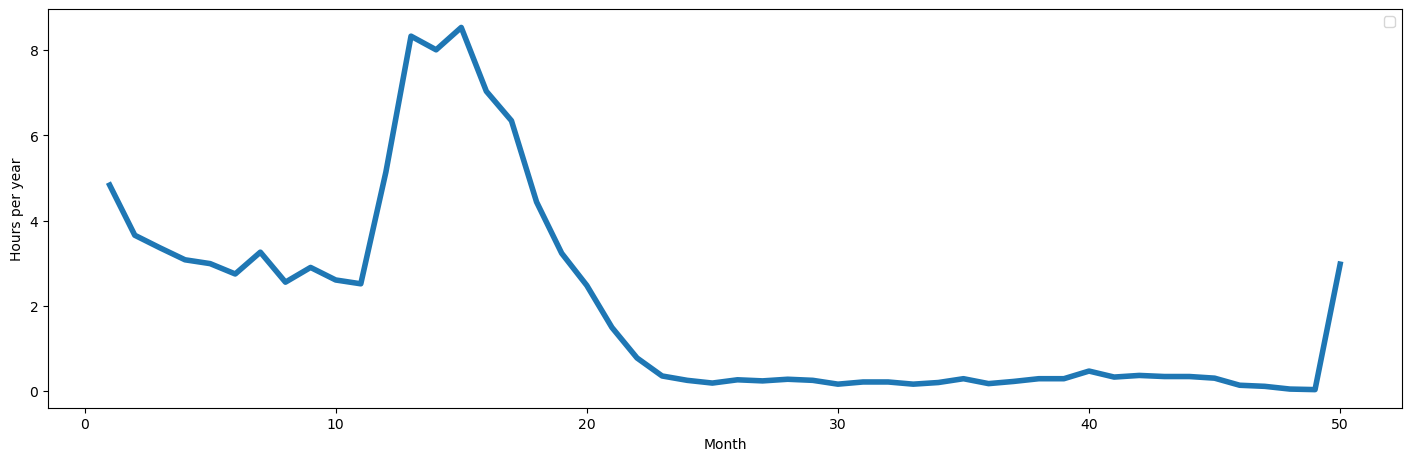

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import calendar

import xarray as xr

# 1. Load your dataset
ds = xr.open_dataset("/work/bb1203/g260190_heinrich/Dunkelflaute/Data/Germany/Dunkelflaute/3_3MW/fldmean/CEU-3_MPI-M-MPI-ESM1-2-HR_CLMcom-Hereon-CCLM-6-0-clm2_Dunkelflaute_historical_Year.nc")

# 2. Select the variable of interest
data = np.squeeze(ds["Dunkelflaute"]).values
# 4. Group by month
counter=0
save_count=[]
for value in data:
    if value>0.2:
        counter+=1
    else:
        if counter>0:
            save_count.append(counter)
            counter=0

values,counts=np.unique(save_count,return_counts=True)
new_values=[]
new_counts=[]
for value,count in zip(values,counts):
    if value>50:
        new_counts[-1]+=count
        continue
    new_values.append(value)
    new_counts.append(count)

values=new_values
counts=new_counts
# 5. Sum over each group of months


fig, axes = plt.subplots(
    nrows=1, ncols=1, figsize=(14, 4.5),
    layout='compressed',
)
axes.plot(values,counts/np.sum(counts)*100,linewidth=4)


axes.set_xlabel("Time [h]")
axes.set_ylabel("Frequency [%]")
axes.legend()
plt.show()

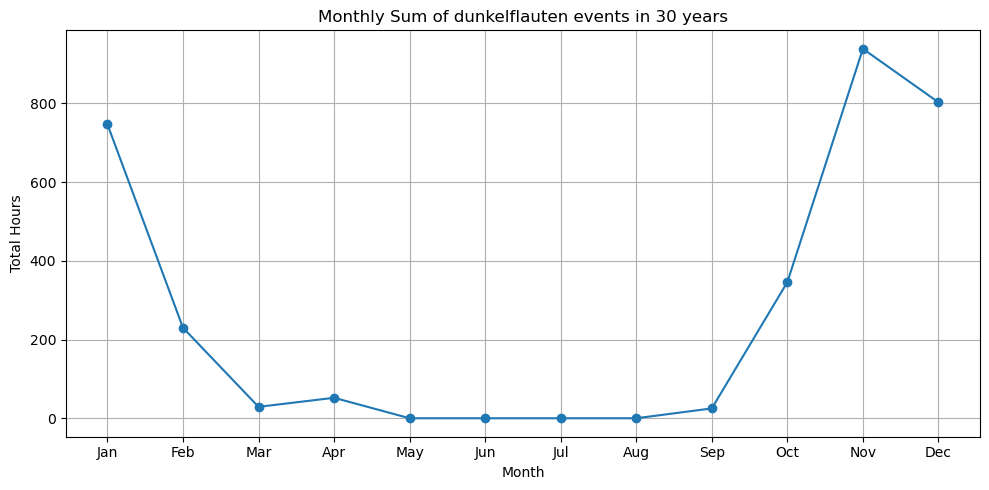

In [13]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the NetCDF dataset
ds = xr.open_dataset("/work/bb1203/g260190_heinrich/Dunkelflaute/Data/Germany/Dunkelflaute/3_3MW/fldmean/CEU-3_MPI-M-MPI-ESM1-2-HR_CLMcom-Hereon-CCLM-6-0-clm2_Dunkelflaute_historical_Year.nc")
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import calendar

# 1. Load your datasets
d_Wind = xr.open_dataset("/work/bb1203/g260190_heinrich/Dunkelflaute/Data/Germany/CF_Wind/3_3MW/fldmean/CEU-3_MPI-M-MPI-ESM1-2-HR_CLMcom-Hereon-CCLM-6-0-clm2_CF_Wind_historical_Year.nc")
d_PV = xr.open_dataset("/work/bb1203/g260190_heinrich/Dunkelflaute/Data/Germany/CF_PV/fldmean/CEU-3_MPI-M-MPI-ESM1-2-HR_CLMcom-Hereon-CCLM-6-0-clm2_CF_PV_historical_Year.nc")
d_DF = xr.open_dataset("/work/bb1203/g260190_heinrich/Dunkelflaute/Data/Germany/Dunkelflaute/3_3MW/fldmean/CEU-3_MPI-M-MPI-ESM1-2-HR_CLMcom-Hereon-CCLM-6-0-clm2_Dunkelflaute_historical_Year.nc")

# 2. Select the variables
data_Wind = d_Wind["CF_Wind"]
data_PV = d_PV["CF_PV"]

# 3. Create a mask where both are < 0.2
combined_mask = ((data_Wind < 0.2) & (data_PV < 0.2)).astype(int)

# Convert to 1D NumPy array
values = combined_mask.values.flatten()

# Step 1: Identify sequences of 1s ≥ 24 long
mask = np.zeros_like(values)

counter = 0
for i, val in enumerate(values):
    if val == 1:
        counter += 1
    else:
        if counter > 24:
            mask[i-counter:i] = 1
        counter = 0

# Catch final sequence if it ends at the last value
if counter > 24:
    mask[len(values)-counter:] = 1

# Step 2: Create a new DataArray with the filtered mask
filtered = xr.DataArray(mask, coords={"time": data.time}, dims="time")

# Step 3: Group by month and sum
monthly_sum = filtered.groupby("time.month").sum()

# Step 4: Plot the result
plt.figure(figsize=(10, 5))
monthly_sum.plot(marker='o', linestyle='-')
plt.title("Monthly Sum of dunkelflauten events in 30 years")
plt.xlabel("Month")
plt.ylabel("Total Hours")
plt.grid(True)
plt.xticks(np.arange(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()
